In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


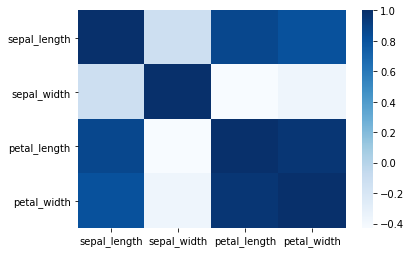

In [4]:
sns.heatmap(iris.corr(),cmap=plt.cm.Blues)

In [5]:
iris_pl = iris.drop(['petal_length'],axis=1)
iris_sl = iris_pl.drop(['sepal_length'],axis = 1)

In [6]:
iris_pl.corr()

,sepal_length,sepal_width,petal_width
sepal_length,1.000000,-0.117570,0.817941
sepal_width,-0.117570,1.000000,-0.366126
petal_width,0.817941,-0.366126,1.000000


In [7]:
def score(iris,norm = 'norm'):
    iris_np = iris.values
    X = iris_np[:,:-1]
    X = X.astype(float)
    if norm =='norm':
        X = (X-X.mean(axis=0))/X.std(axis = 0)
    X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
    y = iris_np[:,-1]
    y_hot = LabelEncoder().fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.3, random_state=42)
    lg = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier(n_estimators=10)
    lg.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    rf.fit(X_train,y_train)
    print("LogisticRegression acc: ",lg.score(X_test,y_test))
    print("DecisionTreeClassifier acc : ",dt.score(X_test,y_test))
    print("RandomForestClassifier: ", rf.score(X_test,y_test))

In [8]:
score(iris)
print('\n\n')
score(iris_pl)
print('\n\n')
score(iris_sl)

LogisticRegression acc:  0.9111111111111111
DecisionTreeClassifier acc :  1.0
RandomForestClassifier:  1.0



LogisticRegression acc:  0.8888888888888888
DecisionTreeClassifier acc :  0.9777777777777777
RandomForestClassifier:  0.9333333333333333



LogisticRegression acc:  0.9111111111111111
DecisionTreeClassifier acc :  0.9333333333333333
RandomForestClassifier:  0.9555555555555556


In [ ]:
score(iris,)
print('\n\n')
score(iris_pl)
print('\n\n')
score(iris_sl)